In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
article=pd.read_csv("/Users/alok.g.v/Desktop/project/H&M data/articles.csv")
transaction=pd.read_csv("/Users/alok.g.v/Desktop/project/H&M data/transactions_train.csv")
customer=pd.read_csv("/Users/alok.g.v/Desktop/project/H&M data/customers.csv")
sample=pd.read_csv("/Users/alok.g.v/Desktop/project/H&M data/sample_submission.csv")

In [3]:
article.head(),article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

(   article_id  product_code          prod_name  product_type_no  \
 0   108775015        108775          Strap top              253   
 1   108775044        108775          Strap top              253   
 2   108775051        108775      Strap top (1)              253   
 3   110065001        110065  OP T-shirt (Idro)              306   
 4   110065002        110065  OP T-shirt (Idro)              306   
 
   product_type_name  product_group_name  graphical_appearance_no  \
 0          Vest top  Garment Upper body                  1010016   
 1          Vest top  Garment Upper body                  1010016   
 2          Vest top  Garment Upper body                  1010017   
 3               Bra           Underwear                  1010016   
 4               Bra           Underwear                  1010016   
 
   graphical_appearance_name  colour_group_code colour_group_name  ...  \
 0                     Solid                  9             Black  ...   
 1                     Sol

In [4]:
transaction

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [5]:
customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [6]:
sample

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


# Checking the distibution of data along each column 

In [7]:
value_list=['prod_name','product_type_name','product_group_name','graphical_appearance_name','department_name','index_group_name'
            ,'garment_group_name','section_name']
for i in value_list:
    print('The Value Count for ',i,'\n\n')
    print(article[i].value_counts())
    print("\n\n\n")

The Value Count for  prod_name 


Dragonfly dress            98
Mike tee                   72
Wow printed tee 6.99       70
1pk Fun                    55
TP Paddington Sweater      54
                           ..
PQ MAY LEATHER SKIRT        1
Basic tights 2-pack TVP     1
Tony woven jumpsuit         1
Andy dress                  1
PQ Emilia saddlebag         1
Name: prod_name, Length: 45875, dtype: int64




The Value Count for  product_type_name 


Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Bra extender         1
Clothing mist        1
Cushion              1
Bumbag               1
Washing bag          1
Name: product_type_name, Length: 131, dtype: int64




The Value Count for  product_group_name 


Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear

# Index vice grouping 

In [8]:
article.groupby(['index_group_name','index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

# Product Group and different products in each group

In [9]:
pd.options.display.max_rows=None
article.groupby(['product_group_name','product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

# Group by the index(Differrent catagories of customers )

Text(0, 0.5, 'Index')

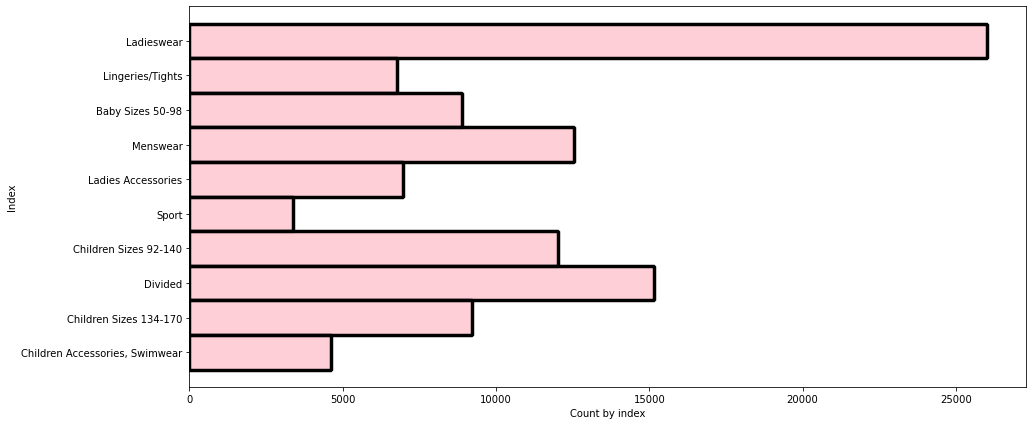

In [10]:
fig,ax=plt.subplots(figsize=(15,7))
ax=sns.histplot(y='index_name',data=article,color='pink')
ax.set_xlabel('Count by index')
ax.set_ylabel('Index')

# we can seethat Ladies wear has the heigest sales and sports wear the lowest 


# Group by type of products and its distribution across different customer base 

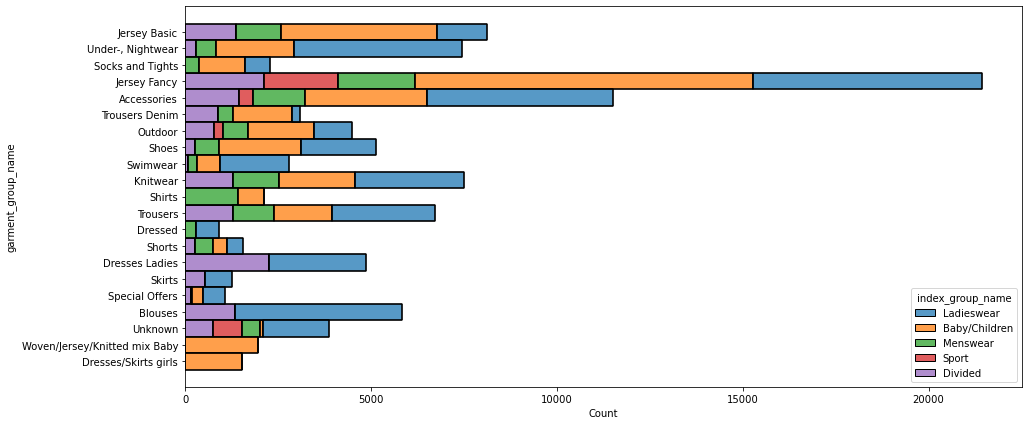

In [11]:
fig,ax=plt.subplots(figsize=(15,7))
ax=sns.histplot(data=article,y='garment_group_name',hue='index_group_name',multiple='stack')

# Customer dataset 


# Distribution of Customers by age 


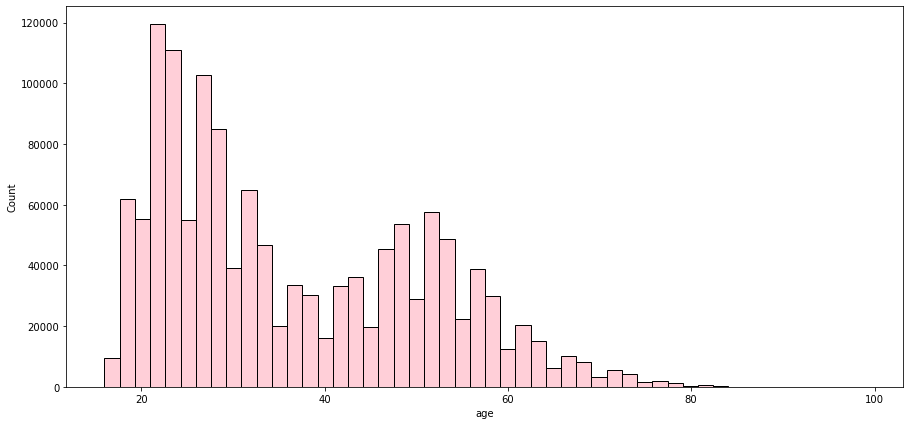

In [12]:
fig,ax=plt.subplots(figsize=(15,7))
ax=sns.histplot(data=customer,x='age',color='pink',bins=50)

# Most common age is between 18 and 30

# D

In [13]:
customer['club_member_status'].isnull().sum()

6062

In [14]:
repl=customer[customer['club_member_status'].isnull()==True]
repl_index=repl.index
repl_index


Int64Index([      5,     844,     853,     908,     940,    1152,    1307,
               1410,    1665,    2298,
            ...
            1368239, 1368364, 1368921, 1369729, 1369886, 1370268, 1370365,
            1370368, 1371434, 1371453],
           dtype='int64', length=6062)

In [15]:
cust_copy=customer.copy()
cust_copy.drop(repl_index,inplace=True)
cust_copy['club_member_status'].isnull().sum()

0

# plot to display Membership interaction in customers 

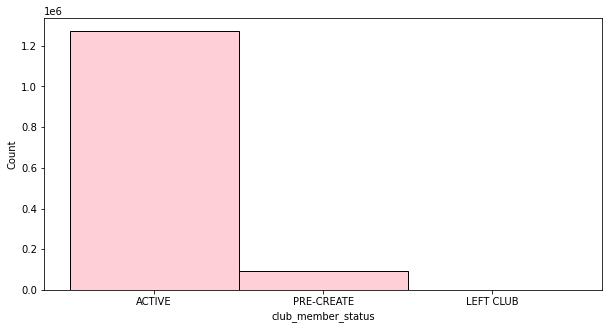

In [16]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.histplot(data=cust_copy,x='club_member_status',color='pink')
plt.show()

# Almost Every customer is a active club member with a very few leaving the club

# Distribution of Newsletter

In [17]:
cust_copy['fashion_news_frequency'].isnull().sum()

13974

In [18]:
repl=cust_copy[cust_copy['fashion_news_frequency'].isnull()==True]
repl_index=repl.index
cust_copy.drop(repl_index,inplace=True)
cust_copy['fashion_news_frequency'].isnull().sum()


0

In [19]:
cust_copy['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', 'Monthly', 'None'], dtype=object)

In [20]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [21]:
cust_copy["fashion_news_frequency"].replace(['None'],'NONE',inplace=True)
cust_copy['fashion_news_frequency'].unique()


array(['NONE', 'Regularly', 'Monthly'], dtype=object)

In [22]:
pie_data=cust_copy[['customer_id','fashion_news_frequency']].groupby('fashion_news_frequency').count()
pie_data

,customer_id
fashion_news_frequency,
Monthly,837
NONE,874008
Regularly,477099


# plot to show the Distribution of fashion news 

Text(0.5, 0, 'Distribution of fashion news frequency')

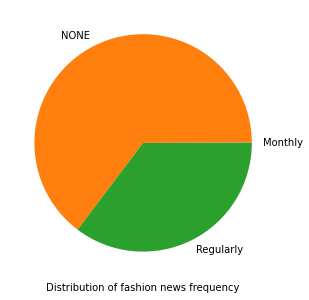

In [23]:
fig,ax=plt.subplots(figsize=(10,5))
ax.pie(pie_data.customer_id,labels=pie_data.index)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')

# Most people opt not to receive newsletters with around 50k people opting for regular news 

# Transaction dataset 

In [24]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [25]:
pd.options.display.max_rows=50

# plot showing Outliers in price

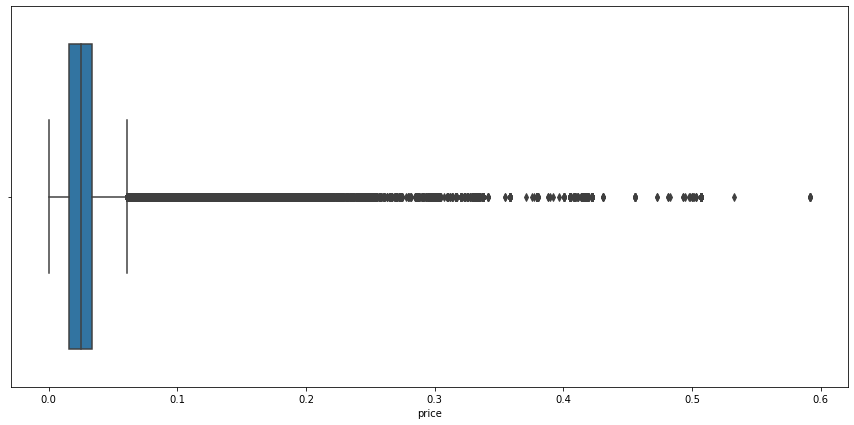

In [26]:
fig,ax=plt.subplots(figsize=(15,7))
ax=sns.boxplot(data=transaction,x='price')

In [27]:
article_merge=article[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
article_merge

,article_id,prod_name,product_type_name,product_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights
...,...,...,...,...,...
105537,953450001,5pk regular Placement1,Socks,Socks & Tights,Menswear
105538,953763001,SPORT Malaga tank,Vest top,Garment Upper body,Ladieswear
105539,956217002,Cartwheel dress,Dress,Garment Full body,Ladieswear
105540,957375001,CLAIRE HAIR CLAW,Hair clip,Accessories,Divided


In [28]:
pd.options.display.max_rows=50

merged_data=transaction[['customer_id', 'article_id', 'price', 't_dat']].merge(article_merge,
                                                                               on='article_id',how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   article_id          int64  
 2   price               float64
 3   t_dat               object 
 4   prod_name           object 
 5   product_type_name   object 
 6   product_group_name  object 
 7   index_name          object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.1+ GB


# Outliers for group name prices. 

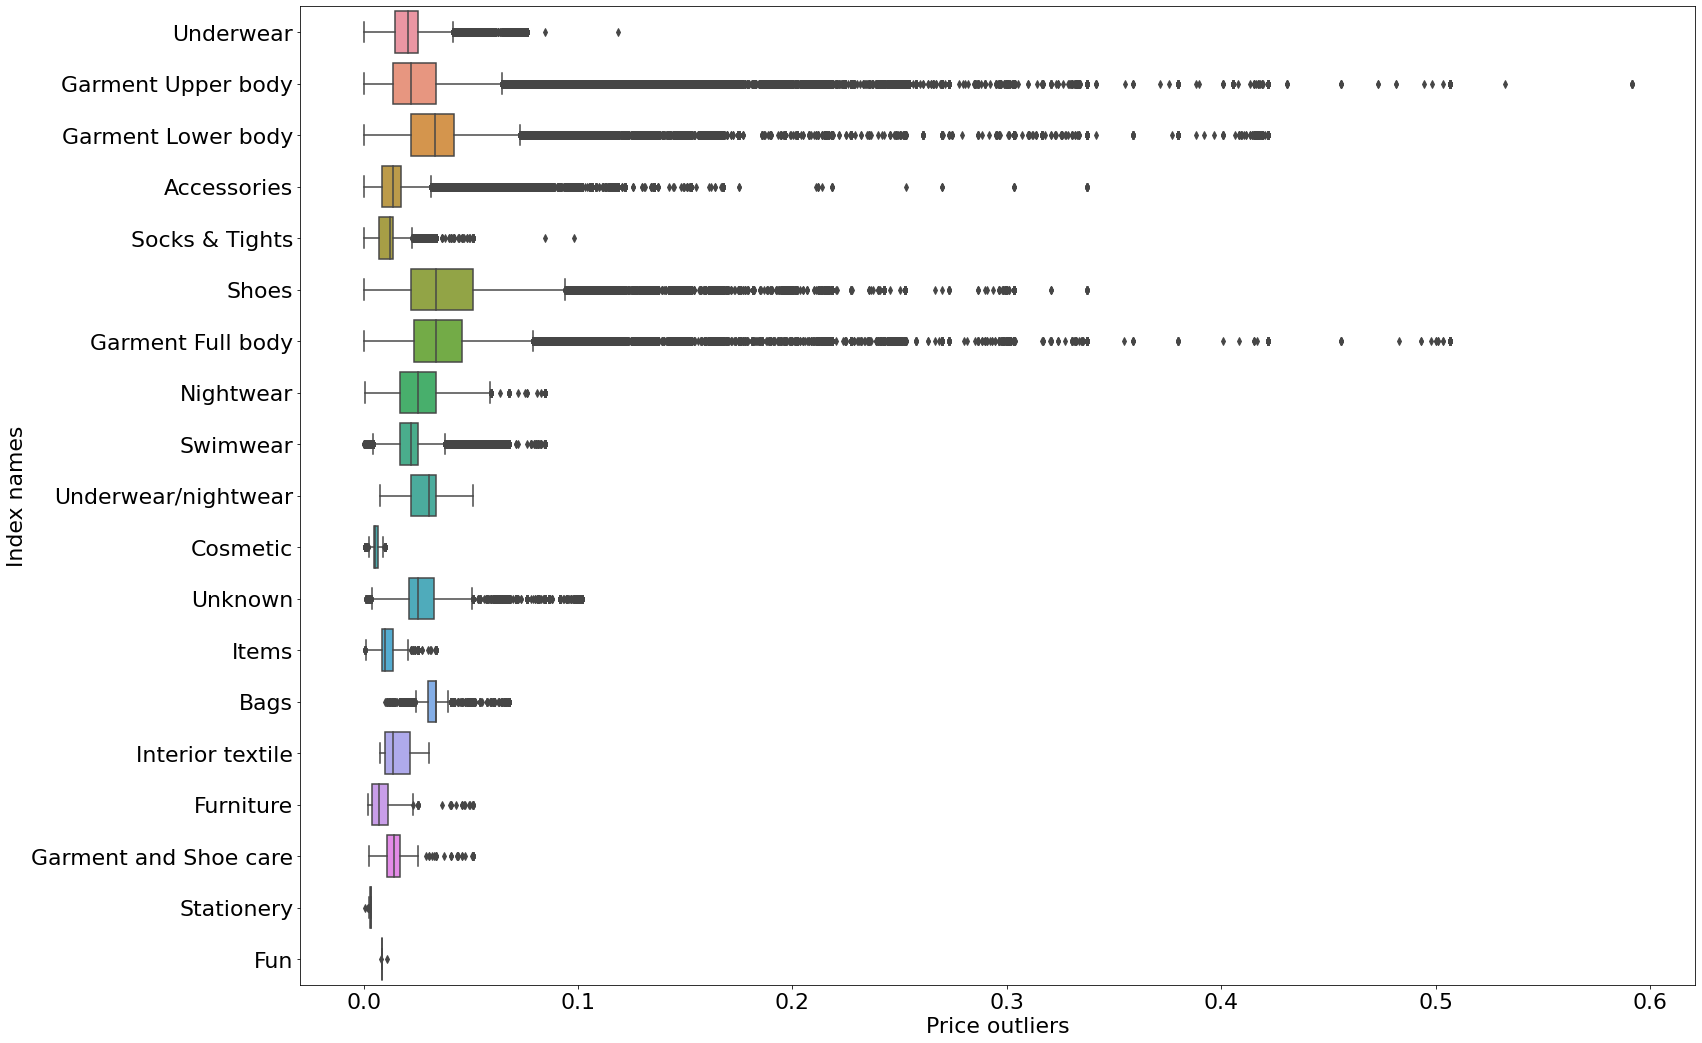

In [29]:
fig,ax=plt.subplots(figsize=(25,18))
ax=sns.boxplot(data=merged_data,x='price',y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)


## Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.

# Plot showing Mean price distribution across product group

Text(0, 0.5, 'Product group')

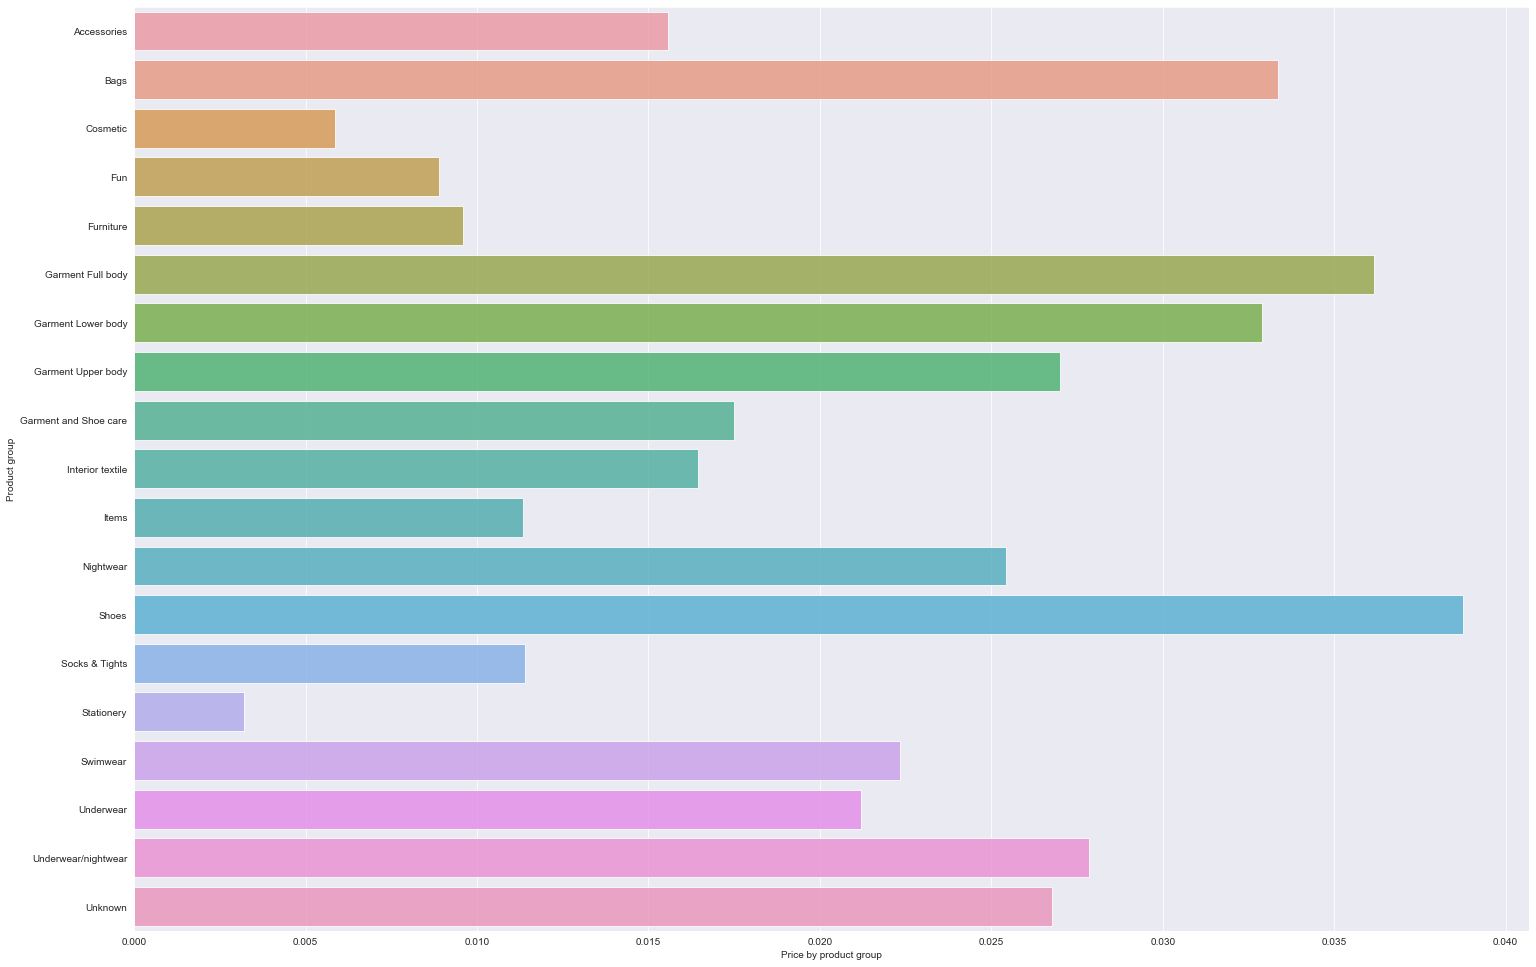

In [30]:
article_index=merged_data[['product_group_name','price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
fig,ax=plt.subplots(figsize=(25,17))
ax=sns.barplot(data=article_index,x='price',y=article_index.index,alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')

In [31]:
merged_data['t_dat'] = pd.to_datetime(merged_data['t_dat'])

# check the mean price change in time for top 5 product groups by mean price: with standard deviation



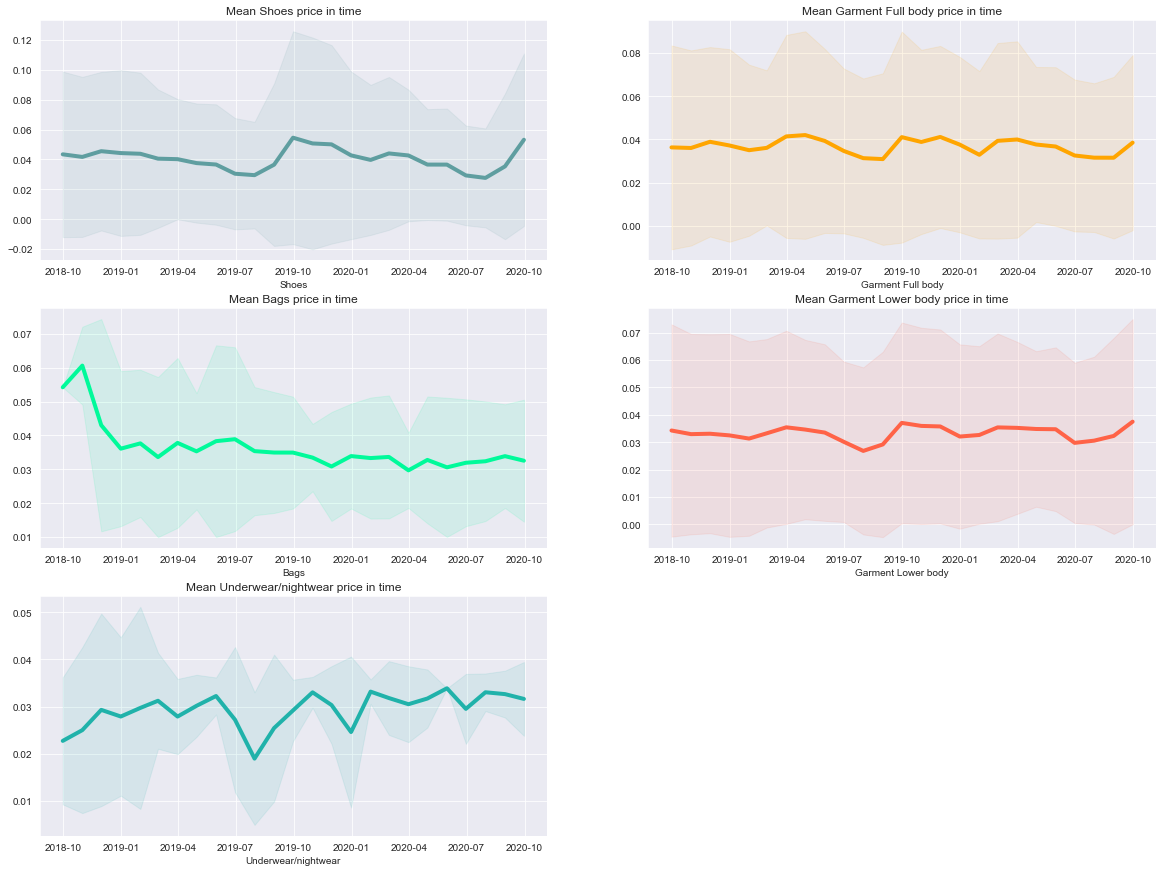

In [32]:
product_list = ['Shoes','Garment Full body','Bags','Garment Lower body','Underwear/nightwear']
colors = ['cadetblue','orange','mediumspringgreen','tomato','lightseagreen']

k=0

f,ax = plt.subplots(3,2,figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product=product_list[k]
            
            m_data=merged_data[merged_data.product_group_name==product_list[k]]
            
            series_mean=m_data[['t_dat','price']].groupby(pd.Grouper(key="t_dat",freq='M')).mean().fillna(0)
            
            series_std=m_data[['t_dat','price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i,j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i,j].fill_between(series_mean.index,np.ravel(series_mean.values-2*series_std.values),
                                 np.ravel(series_mean.values+2*series_std.values),color=colors[k],alpha=.1)
            ax[i,j].set_title(f'Mean {product_list[k]} price in time')
            ax[i,j].set_xlabel('month')
            ax[i,j].set_xlabel(f'{product_list[k]}')
            k+=1
        except IndexError:
            ax[i,j].set_visible(False)
            


# Top 5 articles which are cheapest and costliest items available 

In [33]:
max_price=transaction[transaction.t_dat==transaction.t_dat.max()].sort_values('price',ascending=False).iloc[:5][['t_dat','article_id','price']]
min_price=transaction[transaction.t_dat==transaction.t_dat.max()].sort_values('price',ascending=True).iloc[:5][['t_dat','article_id','price']]


In [34]:
max_price

,t_dat,article_id,price
31761309,2020-09-22,916300001,0.506780
31777419,2020-09-22,780031004,0.422034
31777418,2020-09-22,780031004,0.422034
31777417,2020-09-22,780031001,0.422034
31770379,2020-09-22,916295002,0.422034


In [35]:
min_price

,t_dat,article_id,price
31780208,2020-09-22,386463001,0.000847
31783443,2020-09-22,485414002,0.000847
31763844,2020-09-22,803570002,0.001288
31779503,2020-09-22,807244017,0.001339
31788100,2020-09-22,111609001,0.001339
